In [23]:
import numpy as np
from sklearn.datasets import load_iris

def load_iris_data():
    # Carregar os dados do conjunto de dados iris
    iris = load_iris()
    X = iris.data
    y = iris.target
    return X, y

def calculate_means(X_train, y_train):
    # Calcular as médias de cada classe
    unique_classes = np.unique(y_train)
    class_means = []
    for cls in unique_classes:
        class_means.append(np.mean(X_train[y_train == cls], axis=0))
    return class_means

def calculate_covariance_matrices(X_train, y_train, means):
    # Calcular as matrizes de covariância de cada classe
    unique_classes = np.unique(y_train)
    cov_matrices = []
    for cls, mean in zip(unique_classes, means):
        cov_matrix = np.cov(X_train[y_train == cls], rowvar=False)
        cov_matrices.append(cov_matrix)
    return cov_matrices

def gaussian_pdf(x, mean, cov):
    # Função de densidade de probabilidade gaussiana multivariada
    n = len(x)
    exp_term = np.exp(-0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean)))
    coef = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5)
    return coef * exp_term

def predict_class(X_test, class_means, cov_matrices):
    # Predição da classe para cada amostra no conjunto de teste
    y_pred = []
    for x in X_test:
        probabilities = []
        for mean, cov in zip(class_means, cov_matrices):
            probabilities.append(gaussian_pdf(x, mean, cov))
        y_pred.append(np.argmax(probabilities))
    return np.array(y_pred)

def accuracy_score(y_true, y_pred):
    # Calcular a acurácia
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred, num_classes):
    # Calcular a matriz de confusão
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true][pred] += 1
    return conf_matrix

def holdout_experiment(X, y, n_runs=20, test_size=0.3):
    accuracies = []
    conf_matrices = []
    n_samples = len(X)
    num_classes = len(np.unique(y))
    
    for _ in range(n_runs):
        # Embaralhar os índices dos dados
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        
        # Dividir os dados em conjuntos de treinamento e teste
        split_index = int(n_samples * (1 - test_size))
        train_indices = indices[:split_index]
        test_indices = indices[split_index:]
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Calcular as médias e as matrizes de covariância de cada classe
        class_means = calculate_means(X_train, y_train)
        cov_matrices = calculate_covariance_matrices(X_train, y_train, class_means)

        # Realizar a predição
        y_pred = predict_class(X_test, class_means, cov_matrices)

        # Calcular a acurácia e armazenar
        accuracies.append(accuracy_score(y_test, y_pred))

        # Calcular a matriz de confusão e armazenar
        conf_matrices.append(confusion_matrix(y_test, y_pred, num_classes=num_classes))

    accuracies = np.array(accuracies)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)

    # Encontrar a realização mais próxima da média de acurácia
    mean_index = np.argmin(np.abs(accuracies - mean_accuracy))
    mean_conf_matrix = conf_matrices[mean_index]

    return mean_accuracy, std_accuracy, mean_conf_matrix

# Carregar os dados iris
X, y = load_iris_data()

# Executar o experimento holdout
mean_accuracy, std_accuracy, mean_conf_matrix = holdout_experiment(X, y)

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Confusion Matrix:")
print(mean_conf_matrix)


Mean Accuracy: 0.9722222222222221
Standard Deviation of Accuracy: 0.025215123817578258
Mean Confusion Matrix:
[[15  0  0]
 [ 0 18  1]
 [ 0  0 11]]


Mean Accuracy: 0.7622222222222224
Standard Deviation of Accuracy: 0.05537749241945384
Mean Confusion Matrix:
[[ 8  1  0]
 [ 0 14  6]
 [ 0  4 12]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


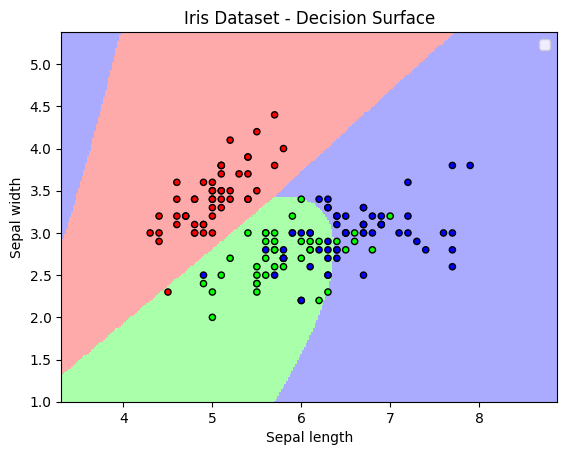

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

def load_iris_data():
    # Carregar os dados do conjunto de dados iris
    iris = load_iris()
    X = iris.data
    y = iris.target
    return X, y

def calculate_means(X_train, y_train):
    # Calcular as médias de cada classe
    unique_classes = np.unique(y_train)
    class_means = []
    for cls in unique_classes:
        class_means.append(np.mean(X_train[y_train == cls], axis=0))
    return class_means

def calculate_covariance_matrices(X_train, y_train, means):
    # Calcular as matrizes de covariância de cada classe
    unique_classes = np.unique(y_train)
    cov_matrices = []
    for cls, mean in zip(unique_classes, means):
        cov_matrix = np.cov(X_train[y_train == cls].T)
        cov_matrices.append(cov_matrix)
    return cov_matrices

def gaussian_pdf(x, mean, cov):
    # Função de densidade de probabilidade gaussiana multivariada
    n = len(x)
    x = x[:2]  # Considerar apenas os dois primeiros atributos
    mean = mean[:2]  # Considerar apenas os dois primeiros atributos da média
    cov = cov[:2, :2]  # Considerar apenas os dois primeiros atributos da matriz de covariância
    exp_term = np.exp(-0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean)))
    coef = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5)
    return coef * exp_term

def predict_class(X_test, class_means, cov_matrices):
    # Predição da classe para cada amostra no conjunto de teste
    y_pred = []
    for x in X_test:
        probabilities = []
        for mean, cov in zip(class_means, cov_matrices):
            probabilities.append(gaussian_pdf(x, mean, cov))
        y_pred.append(np.argmax(probabilities))
    return np.array(y_pred)

def accuracy_score(y_true, y_pred):
    # Calcular a acurácia
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred, num_classes):
    # Calcular a matriz de confusão
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        conf_matrix[true][pred] += 1
    return conf_matrix

def holdout_experiment(X, y, n_runs=20, test_size=0.3):
    accuracies = []
    conf_matrices = []
    n_samples = len(X)
    num_classes = len(np.unique(y))
    
    for _ in range(n_runs):
        # Embaralhar os índices dos dados
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        
        # Dividir os dados em conjuntos de treinamento e teste
        split_index = int(n_samples * (1 - test_size))
        train_indices = indices[:split_index]
        test_indices = indices[split_index:]
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Calcular as médias e as matrizes de covariância de cada classe
        class_means = calculate_means(X_train, y_train)
        cov_matrices = calculate_covariance_matrices(X_train, y_train, class_means)

        # Realizar a predição
        y_pred = predict_class(X_test, class_means, cov_matrices)

        # Calcular a acurácia e armazenar
        accuracies.append(accuracy_score(y_test, y_pred))

        # Calcular a matriz de confusão e armazenar
        conf_matrices.append(confusion_matrix(y_test, y_pred, num_classes=num_classes))

    accuracies = np.array(accuracies)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)

    # Encontrar a realização mais próxima da média de acurácia
    mean_index = np.argmin(np.abs(accuracies - mean_accuracy))
    mean_conf_matrix = conf_matrices[mean_index]

    return mean_accuracy, std_accuracy, mean_conf_matrix

def plot_decision_surface(X, y, class_means, cov_matrices):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = predict_class(np.c_[xx.ravel(), yy.ravel()], class_means, cov_matrices)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot dos pontos de treinamento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Iris Dataset - Decision Surface')
    plt.legend()
    plt.show()

# Carregar os dados iris
X, y = load_iris_data()

# Executar o experimento holdout
mean_accuracy, std_accuracy, mean_conf_matrix = holdout_experiment(X, y)

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Confusion Matrix:")
print(mean_conf_matrix)

# Plot da superfície de decisão
class_means = calculate_means(X, y)
cov_matrices = calculate_covariance_matrices(X, y, class_means)
plot_decision_surface(X[:, :2], y, class_means, cov_matrices)
